<a href="https://colab.research.google.com/github/l6040205/programming-for-data-portfolio/blob/main/Session%205/Sprint%201/R_Student_performance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Using R for data analysis # 

R is a powerful statistical tool used frequently in science academia. Similar to Python, to use R effectively, we must use a variety of libraries.  

**Run the cell block below to install and load the necessary packages**

In [ ]:
# this code needs to be run once to install the packages on your system
install.packages("tidyverse")
install.packages("ggplot2")
install.packages("fastDummies")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



**Run the cell block below here to open the packages ready for use**

In [ ]:
# this code needs to be run to open the packages 

# tidyverse includes dpylr which includes all the functions such as mutate, select, summarise etc
library("tidyverse")

# ggplot2 contains all the visualisation tools (similar to matplotlib)
library("ggplot2")

# fastdummies is for dummy coding
library("fastDummies")

# displaying in real numbers 

options(scipen = 999)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.2     ✔ dplyr   1.0.6
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



### In this worksheet you will be analysing student performance data and performing a multiple linear regression. ###

url = "https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/exams.csv"

### Setting variables ### 

```variable <- ...```

**In R we use <- instead of using = python** 

### Reading data from our computer into a variable ###

```df <- read_csv("data.csv")```

### Reading data from a URL into a variable ###

```df <- read_csv("https://raw.github.com/file.csv")```

### Look at the first few rows of the dataset ###

```head(data)```

### Summary of the data ###

```summary(data)```

## Exercise 1
---

Read the data into a variable and have a look at it. 

In [ ]:
df <- read_csv("https://raw.githubusercontent.com/lilaceri/Working-with-data-/main/exams.csv")
head(df)


── Column specification ────────────────────────────────────────────────────────
cols(
  gender = col_character(),
  ethnicity = col_character(),
  parental_education = col_character(),
  lunch = col_character(),
  preparation_course = col_character(),
  math_score = col_double(),
  reading_score = col_double(),
  writing_score = col_double()
)




gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group E,some college,free/reduced,none,65,76,71
male,group C,some college,standard,completed,75,72,69
female,group B,some high school,free/reduced,completed,62,56,61
male,group D,some high school,standard,completed,60,60,59
female,group C,high school,free/reduced,completed,34,54,55
female,group B,some college,free/reduced,none,53,66,61


# Lets have a look at the data ###

We can use the `arrange()` function to sort the data

```
arranged_column <- arrange(data, column_name)
head(arranged_column)
tail(arranged_column)
summary(arranged_column)
```

We can use the select() function to look at specific columns

```
column_specific <- select(data, column_1, column_2)
column_specific
```



### Exercise 2 ###
---

Now have a go looking at the data in different ways, using the functions above:

In [ ]:
arranged_column <- arrange(df, ethnicity)
head(arranged_column)
tail(arranged_column)
summary(arranged_column)

# column_specific <- select(df, math_score, reading_score)
# column_specific

gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group A,some high school,free/reduced,none,38,57,52
male,group A,master's degree,free/reduced,completed,58,60,56
female,group A,high school,free/reduced,completed,71,85,81
female,group A,some high school,free/reduced,completed,65,84,80
male,group A,high school,free/reduced,none,37,46,38
male,group A,high school,free/reduced,none,57,59,53


gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
female,group E,some college,free/reduced,completed,62,67,67
female,group E,bachelor's degree,standard,completed,74,83,85
male,group E,associate's degree,standard,completed,81,69,76
female,group E,high school,standard,none,77,82,83
male,group E,some college,standard,none,100,81,84
male,group E,high school,standard,none,79,78,69


    gender           ethnicity         parental_education    lunch          
 Length:1000        Length:1000        Length:1000        Length:1000       
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 preparation_course   math_score     reading_score    writing_score   
 Length:1000        Min.   : 13.00   Min.   : 16.00   Min.   : 12.00  
 Class :character   1st Qu.: 57.00   1st Qu.: 60.00   1st Qu.: 58.00  
 Mode  :character   Median : 67.00   Median : 70.00   Median : 69.00  
                    Mean   : 66.86   Mean   : 69.72   Mean   : 68.58  
                    3rd Qu.: 77.00   3rd Qu.: 80.00   3rd Qu.: 80.00  
                    Max.   :100.00 

# Prepare the data for a linear regression

Rows containing null, or error-prone values can affect statistics such as measures of central tendency (e.g. mean, median) and operations such as linear regressions, reducing accuracy.

To check for null values we can use:

``` is.na(data) ```

To remove rows which contain null values we can use:  

``` data <- na.omit(data) ```   
or 

``` data <- drop_na(data) ```

**Make sure to set it into the dataframe variable to save the change** 

To check a columns datatype:

``` is.numeric(data$column) ```  
``` is.character(data$column) ```

To change columns datatype to numeric:

``` data$column <- as.numeric(data$column) ```  
**Make sure to set it into the dataframe variable to save the change**


### Exercise 3
---

Check your dataframe for null values and remove rows with null values if necessary

In [ ]:
is.numeric(df$gender)
is.na(df)

[1] FALSE

gender,ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


### Visualise data distribution ### 
---

In statistics, when you are preparing data for analysis, you must first check if your data is Gaussian or not (normally distributed). 

If data is normally distributed, it will have a bell curve and the spread of the data will tend to be small, with the mean centred in the data.

The types of statistical test that are meaningful for the data depend on whether or not your data is normally distributed. 

To check for normality, lets first look at a histogram: 

**Using the ggplot2 package (similar to pythons Matplotlib):**

```qplot(data$column, geom="histogram") ```

In R, `$` is used to specify the dataframe and target column so `data$age` would tell R to look at the age column - in Python pandas this would be ```df['age'] ```

### Exercise 4 ###
---

Create histograms to check the distribution of each numeric column in your data (writing_score, reading_score, math_score)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



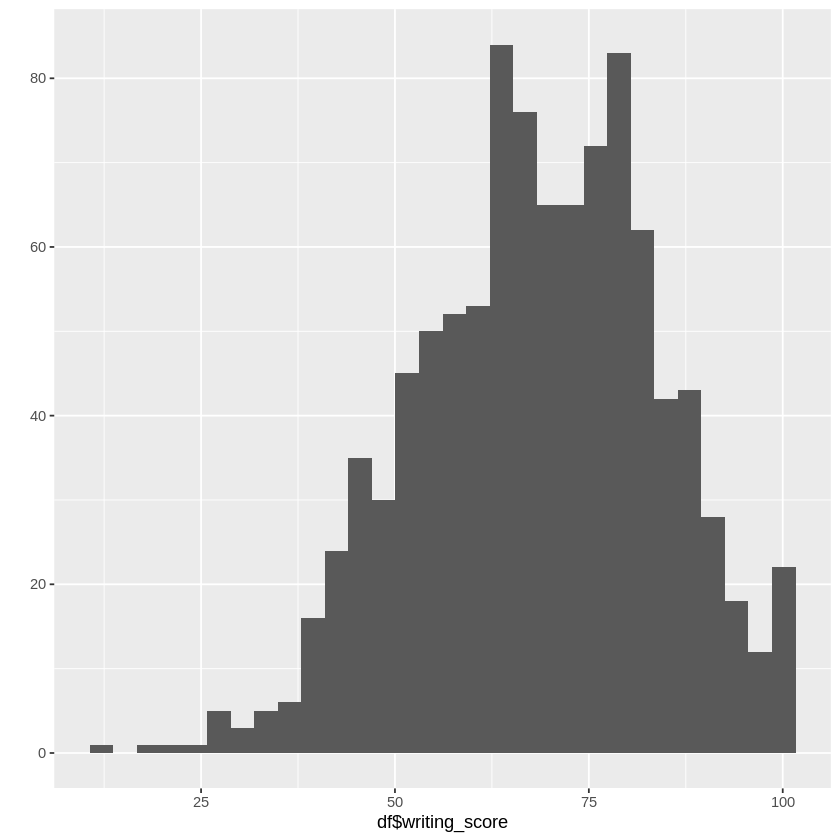

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



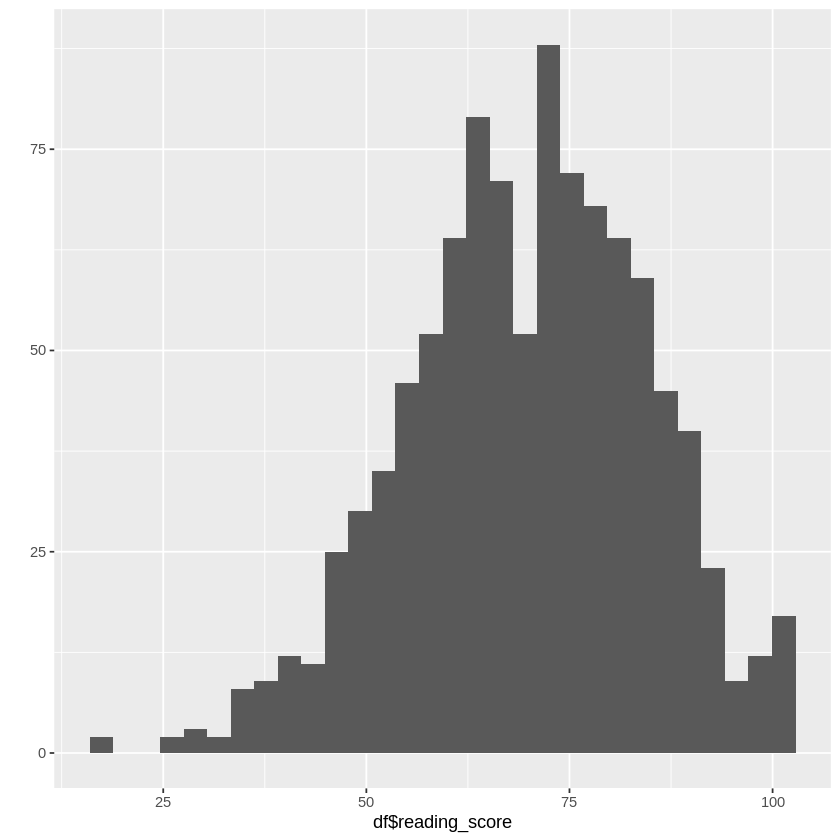

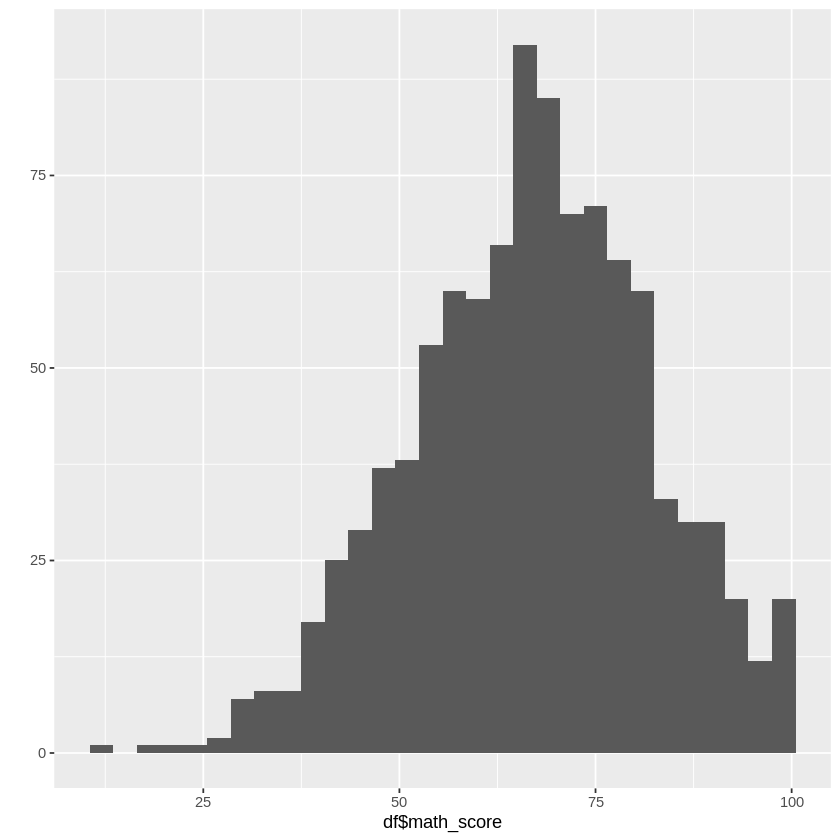

In [ ]:
qplot(df$writing_score, geom="histogram")
qplot(df$reading_score, geom="histogram")
qplot(df$math_score, geom="histogram")

## What about data that isn't numeric?
---

A linear regression is essentially a mathematical formula, which finds 2 terms (the slope and intercept) and can use that to predict new values. 

Obviously you cannot do any calculations on words (such as male or female). Therefore, we need to 'dummy code' categorical values such as sex.

When R does the mathematical equation for the regression, we do not want the new dummy codes to interfere with the calculation, to get around that, we code the data using 0 and 1. 

**There are many ways to dummy code your data, but to make things easy we are going to use a package!**

``` df_dummy <- dummy_cols(data, select_columns = c('column1', 'column2', 'column3'), remove_first_dummy = TRUE, remove_selected_columns = TRUE) ```

The above code sets the new dataframe in a variable called `df_dummy`, it then states which dataframe we mean, then in the brackets, you put the column names that you want dummy coded. 

```remove_selected_columns = TRUE``` tells R to delete the existing categorical data columns afterwards

```remove_first_dummy = TRUE``` tells R to remove the first dummy column. dummy_cols will create one column for each categorical value in the original column (so the sex columns becomes 2 columns called sex_female and sex_male) So removing the first column would leave the column sex__male,  where 1 means male and 0 means female. This is important as it stops multicollinearity in your model (your variables being too related to each other messing up the results). 

### Exercise 5 ###
---

Dummy code the catergorical columns, removing the first dummy and the original columns. 

In [ ]:
df_dummy <- dummy_cols(df, select_columns = c('gender'), remove_first_dummy = TRUE, remove_selected_columns = TRUE)
df_dummy

ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score,gender_male
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>
group E,some college,free/reduced,none,65,76,71,0
group C,some college,standard,completed,75,72,69,1
group B,some high school,free/reduced,completed,62,56,61,0
group D,some high school,standard,completed,60,60,59,1
group C,high school,free/reduced,completed,34,54,55,0
group B,some college,free/reduced,none,53,66,61,0
group D,some college,standard,none,85,88,92,0
group E,some high school,standard,none,93,73,70,1
group C,associate's degree,standard,completed,58,71,63,0


### We want to work out if all the independent variables (eg. gender, race, parents education) predict students exam peformance. ###
---

At the moment, writing, math and reading scores are seperated.   
Lets make a new column with the total scores.   

To do this we use the ``mutate()`` function 

``` new_df <- mutate(data, new_column = ....) ```

eg: 

``` new_df <- mutate(data, new_column = column1 / column2) ```  
``` new_df <- mutate(data, new_column = column1 + column2) ```  
``` new_df <- mutate(data, new_column = column1 * 2) ```  

etc..

### Exercise 6 ###
---

Using the mutate function, create a new column called ```total_score``` which contains the sum of each students reading, writing and math scores. 

In [ ]:
new_df <- mutate(df_dummy, total_score = math_score	+ reading_score + writing_score)
new_df

ethnicity,parental_education,lunch,preparation_course,math_score,reading_score,writing_score,gender_male,total_score
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
group E,some college,free/reduced,none,65,76,71,0,212
group C,some college,standard,completed,75,72,69,1,216
group B,some high school,free/reduced,completed,62,56,61,0,179
group D,some high school,standard,completed,60,60,59,1,179
group C,high school,free/reduced,completed,34,54,55,0,143
group B,some college,free/reduced,none,53,66,61,0,180
group D,some college,standard,none,85,88,92,0,265
group E,some high school,standard,none,93,73,70,1,236
group C,associate's degree,standard,completed,58,71,63,0,192


### Outliers
--- 

For the purpose of today, as we are more focused on understanding how to read a linear regression output, we wont worry about outliers in the data.   

However, removing outliers can improve the quality of your model due to excluding abnormalities in the data and we will look at this in more detail in the future. 

### We are now ready to do our multiple linear regression ###
---

We are looking to find out using our dataset if we can predict student exam performance. 

Therefore, total_score is our dependent variable (DV) as it can be changed by the other variables 

Gender, ethnicity, parental_education, lunch and preparation_course are therefore our independent variables (IV) as they cannot be affected by students exam performance.   

To do a linear regression, we are going to create a model that tests how significantly the IV's impact the DV.   

**how?**

``` regression_model <- lm(DV ~ IV1 + IV2 + IV3..., data = df) ```  
``` summary(regression_model) ```

The above code does a very similar thing to stats.linregress in python! 

**Some of the new dummy variable names are seperated by spaces, so to include them incase them in \` ` (backtick)**

eg. \` ethnicity_group B `

### Exercise 7 ###
---
Perform a linear regression using total_score as the DV and display the summary data 


In [ ]:
regression_model <- lm(total_score ~ gender_male + ethnicity + parental_education + lunch + preparation_course, data = new_df)
summary(regression_model)


Call:
lm(formula = total_score ~ gender_male + ethnicity + parental_education + 
    lunch + preparation_course, data = new_df)

Residuals:
     Min       1Q   Median       3Q      Max 
-163.453  -24.851   -0.639   26.237   82.150 

Coefficients:
                                    Estimate Std. Error t value
(Intercept)                          205.679      5.448  37.754
gender_male                          -13.563      2.338  -5.801
ethnicitygroup B                      -6.106      4.865  -1.255
ethnicitygroup C                      -1.030      4.584  -0.225
ethnicitygroup D                      10.552      4.704   2.243
ethnicitygroup E                      24.838      5.050   4.918
parental_educationbachelor's degree    6.775      4.424   1.531
parental_educationhigh school         -7.058      3.775  -1.870
parental_educationmaster's degree     21.103      5.023   4.201
parental_educationsome college        -2.525      3.587  -0.704
parental_educationsome high school   -17.693    

### Lets understand the output ### 
---

**Statistical significance**

If something is statistically significant it means that the probability that the hypothesis (the thing your asking) is true/correct, is very very high aka less than 5% chance that the effect on the DV is random. 

So when reading a regression output, if the p-value (the right hand column) is less than 0.05 then it means it is significant, and more than 95% likely to be affecting the DV. 

In R, *'s are used to indicate which variables are significantly predicting the dependent variable. 

**The regression equation** 

The equation for a line of best fit is y = mx + c or y = slope*x + intercept. 

y = dependent variable
x = independent variable

In a multiple linear regression, we have multiple x. 

The equation is therefore:

```y = intercept + slope1*x1 + slope2*x2... ```

Each x (IV) has its own slope. 

**Coefficents (slope)**

The estimates column lists all the regression coefficents (slopes) for each variable. What these mean in simple terms is how much the dependent variable is increased or decreased by that variable. These only matter however, if the variable is significant.   

So for example, if gender_male was significant (p-value < 0.05) and had a positive coefficent, it would mean that male students were performing significantly better in their exams than female students. Therefore, gender predicted exam performance. A negative coefficent would mean that the score is less for males or rather more for females. 

**R squared**

R^2 is how well your variables explain the variance in value of the dependent variable. So the higher the R^2 value, the better your model explains the change in value of your dependent variable. 

A low R^2 doesnt necessarily mean that your model is bad, but indicates that the variables in your dataset are not telling the whole story! 

For example, a R^2 of 0.50 would mean that your data only explains 50% of the change in scores between each student. 

Essentially it tells you how well your model fits the data. 


**F-Statistic**

It shows results of a complex mathematical formula. But we only need to worry about it's significance! If your F statistic is significant ( p-value < 0.05), it means that when compared with a model which does not have any of the independent variables in it, your model is better. 


### Exercise 8 ###
---

Read the regression output and write some comments on the findings. 
Try to note which variables are significant, and evaluate how well the variables explain student performance. 


In [ ]:
# F-statistic: 32.45 on 12 and 987 DF ,  p-value: < 0.00000000000000022
# My p-value is < 0.05, so data depended somehow 

# Multiple R-squared:  0.2829
# My data describes only 28% of data change

# Most related values is: Lunch, ethnicitygroup E, preparation_coursenone
# lunch = standard  
# ethnicity = group E
# preparation_course = completed
# parental_education	= master's degree

### Assumptions ###
---
When we do linear regressions we have to assume that our data is guassian (normally distributed). We therefore now need to test that our assumptions of normality are true and that our model is therefore meaningful. 

1. linearity :

``` plot(model, 1) ```

A largely horizontal line at about 0 means that our data has good linearity, meaning our model is good!

2. Q-Q plot or P-P plot: 

``` plot(model, 2) ```

The points following a straightish diagonal line means that again we have good normality. 


### Exercise 9 ###
---

Check both the assumptions of your model and write a comment with your findings

# Exploring the data
---

In the previous exercises, we only looked at the effect on total score. Now that we know that some of our variables did significantly predict student exam scores let's explore it in more detail. 

### Exercise 10
---

* Run a regression called `write_mod` using `writing_score` as the DV 
* Run a regression called `read_mod` using `reading_score` as the DV
* Run a regression called `math_mod` using `math_score` as the DV 
* Compare the results with the model from exercise 7 and comment your findings
* Compare the results of each model with each other. What inferences can you 
make?
* Look at the difference in coefficents of significant variables between models - what does it tell you?


# Reflection
----

## What skills have you demonstrated in completing this notebook?

Your answer:

## What caused you the most difficulty?

Your answer: